Implementation of Perceptron from scratch

In [ ]:
import numpy as np
# import matplotlib.pyplot as plt

In [ ]:
    # Training data for AND gate
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y = np.array([0, 0, 0, 1])

    # #Training data y=f(x)=2x+3
    # X = np.array([[1],[2],[3],[4],[5]])
    # y = np.array([5,7,9,11,13])

In [ ]:
def step(x,th):
  if x>=th:
    return(1)
  return(0)

def linearInt(x):
  return (round(x))

def predict(X, y, weights):
  print("X\tActual\tPredicted")
  for x_input, y_output in zip(X, y):
    inSum=np.sum(x_input * weights)
    y_pred = step(inSum,th)
    print(x_input,"\t",y_output,"\t",y_pred)


In [ ]:
# initialize constants
lr = 0.1
th = 0.5

# Initialize weights array
weights = []

# Loop through each element in X
for i in range(X.shape[1]): #+1 for te bias
    # Initialize w randomly between 0 and 1 using Python's random module & Convert w to have only one digit after the decimal point
    w = round(np.random.rand(),1)
    weights.append(w)

print("Randomly initialized weights for each input:")
for i in range(len(weights)):
    print(f"weights[{i}]:", weights[i])

Randomly initialized weights for each input:
weights[0]: 0.4
weights[1]: 0.7


In [ ]:
# initialize constants
lr = 0.1
th = 0.5

# Initialize weights array
weights = []

# Loop through each element in X
for i in range(X.shape[1]): #+1 for te bias
    # Initialize w randomly between 0 and 1 using Python's random module & Convert w to have only one digit after the decimal point
    w = round(np.random.rand(),1)
    weights.append(w)

print("Randomly initialized weights for each input:")
for i in range(len(weights)):
    print(f"weights[{i}]:", weights[i])

Randomly initialized weights for each input:
weights[0]: 0.9
weights[1]: 0.9


In [ ]:
#For AND/OR Logic Gates
# print (step(0.5,th))
iterateFlag = True
while (iterateFlag):
  iterateFlag = False
  for x_input, y_output in zip(X, y):
    inSum=np.sum(x_input * weights)
    y_pred = step(inSum,th)
    err = y_output - y_pred
    if(err!=0):
      iterateFlag = True
      for i in range(len(weights)):
        dw = lr * x_input[i] * err
        weights[i] = weights[i] + dw
      print("input:",x_input, "actual output:",y_output,"predicted output: ",y_pred,"updated weights:", weights)

print("Final weights:", weights)

input: [0 1] actual output: 0 predicted output:  1 updated weights: [0.4, 0.69]
input: [0 1] actual output: 0 predicted output:  1 updated weights: [0.4, 0.6799999999999999]
input: [0 1] actual output: 0 predicted output:  1 updated weights: [0.4, 0.6699999999999999]
input: [0 1] actual output: 0 predicted output:  1 updated weights: [0.4, 0.6599999999999999]
input: [0 1] actual output: 0 predicted output:  1 updated weights: [0.4, 0.6499999999999999]
input: [0 1] actual output: 0 predicted output:  1 updated weights: [0.4, 0.6399999999999999]
input: [0 1] actual output: 0 predicted output:  1 updated weights: [0.4, 0.6299999999999999]
input: [0 1] actual output: 0 predicted output:  1 updated weights: [0.4, 0.6199999999999999]
input: [0 1] actual output: 0 predicted output:  1 updated weights: [0.4, 0.6099999999999999]
input: [0 1] actual output: 0 predicted output:  1 updated weights: [0.4, 0.5999999999999999]
input: [0 1] actual output: 0 predicted output:  1 updated weights: [0.4, 

input: [1] actual output: 5 predicted output:  2 updated weights: [0.53, 0.53]
input: [2] actual output: 7 predicted output:  3 updated weights: [0.61, 0.5700000000000001]
input: [3] actual output: 9 predicted output:  4 updated weights: [0.76, 0.6200000000000001]
input: [4] actual output: 11 predicted output:  6 updated weights: [0.96, 0.6700000000000002]
input: [5] actual output: 13 predicted output:  9 updated weights: [1.16, 0.7100000000000002]
input: [1] actual output: 5 predicted output:  3 updated weights: [1.18, 0.7300000000000002]
input: [2] actual output: 7 predicted output:  5 updated weights: [1.22, 0.7500000000000002]
input: [3] actual output: 9 predicted output:  7 updated weights: [1.28, 0.7700000000000002]
input: [4] actual output: 11 predicted output:  9 updated weights: [1.36, 0.7900000000000003]
input: [5] actual output: 13 predicted output:  12 updated weights: [1.4100000000000001, 0.8000000000000003]
input: [1] actual output: 5 predicted output:  3 updated weights:

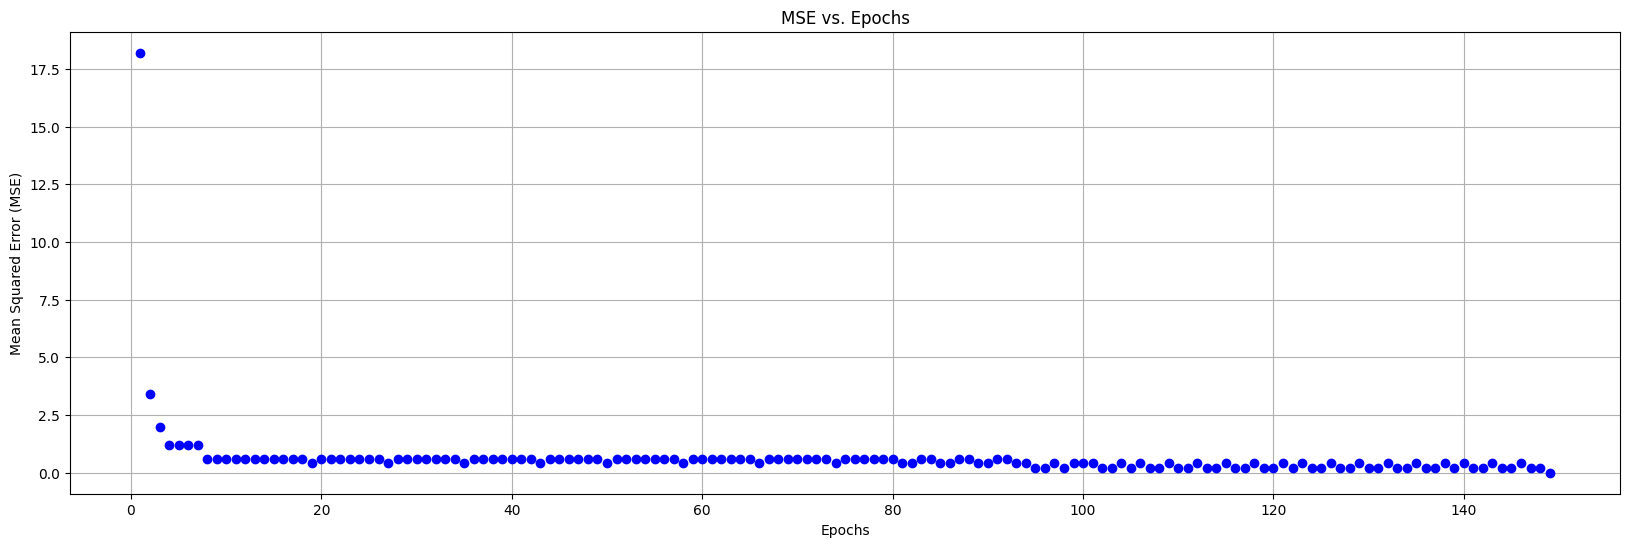

In [ ]:
# for y=f(x)=2x+3

iterateFlag = True
# Lists to store MSE values and epoch numbers
mse_values = []
epochs = []
epoch_count = 0

while (iterateFlag):
  epoch_count += 1
  squared_errors = []
  iterateFlag = False

  for x_input, y_output in zip(X, y):
    inSum = np.sum(x_input * weights)
    inSum += 1 * weights[len(weights)-1]
    # y_pred = step(inSum,th)
    y_pred = linearInt(inSum)
    err = y_output - y_pred
    squared_errors.append(err**2)
    if(err!=0):
      iterateFlag = True
      for i in range(len(weights)-1):
        dw = lr * x_input[i] * err
        weights[i] = weights[i] + dw
      weights[len(weights)-1] += lr * np.sum(err)
      print("input:",x_input, "actual output:",y_output,"predicted output: ",y_pred,"updated weights:", weights)
  mse = np.mean(squared_errors)
  mse_values.append(mse)
  epochs.append(epoch_count)
print("Final weights:", weights)


# Plot MSE vs. Epochs
plt.figure(figsize=(20, 6))  # Set figure size wider
plt.plot(epochs, mse_values, marker='o', linestyle='None', color='blue')  # Plot MSE values as dots
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs. Epochs')
plt.grid(True)  # Add grid
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate Mean Squared Error (MSE)
def calculate_mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

# Training data
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([5, 7, 9, 11, 13])

# Initialize weights
weights = np.array([0.1, 0.3])

# Learning rate
lr = 0.01

# Threshold
th = 0.5

# Activation function (linear)
def linearInt(x):
    return x

# Lists to store MSE values and epoch numbers
mse_values = []
epochs = []
epoch_count = 0

# Training loop
iterateFlag = True
while iterateFlag:
    epoch_count += 1
    squared_errors = []
    iterateFlag = False

    for x_input, y_output in zip(X, y):
        inSum = np.sum(x_input * weights)
        inSum += 1 * weights[-1]
        y_pred = linearInt(inSum)
        err = y_output - y_pred
        squared_errors.append(err**2)
        if err != 0:
            iterateFlag = True
            for i in range(len(weights)-1):
                dw = lr * x_input[i] * err
                weights[i] = round(weights[i] + dw, 3)  # Round to 3 decimal points
            weights[-1] = round(weights[-1] + lr * np.sum(err), 3)  # Round to 3 decimal points
            print("input:", x_input, "actual output:", y_output, "predicted output:", y_pred, "updated weights:", weights)
    mse = np.mean(squared_errors)
    mse_values.append(mse)
    epochs.append(epoch_count)

print("Final weights:", weights)

# Plot MSE vs. Epochs
plt.plot(epochs, mse_values)
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs. Epochs')
plt.show()


Streaming output truncated to the last 5000 lines.
input: [3] actual output: 9 predicted output: 8.84 updated weights: [0.677 1.708]
input: [4] actual output: 11 predicted output: 11.248 updated weights: [0.667 1.706]
input: [5] actual output: 13 predicted output: 13.570999999999998 updated weights: [0.638 1.7  ]
input: [1] actual output: 5 predicted output: 4.038 updated weights: [0.648 1.71 ]
input: [2] actual output: 7 predicted output: 6.426 updated weights: [0.659 1.716]
input: [3] actual output: 9 predicted output: 8.841 updated weights: [0.664 1.718]
input: [4] actual output: 11 predicted output: 11.246 updated weights: [0.654 1.716]
input: [5] actual output: 13 predicted output: 13.565999999999999 updated weights: [0.626 1.71 ]
input: [1] actual output: 5 predicted output: 4.045999999999999 updated weights: [0.636 1.72 ]
input: [2] actual output: 7 predicted output: 6.4319999999999995 updated weights: [0.647 1.726]
input: [3] actual output: 9 predicted output: 8.844999999999999

KeyboardInterrupt: 

In [ ]:
predictFx(X,y,weights)

X	Actual	Predicted
[1] 	 5 	 5
[2] 	 7 	 7
[3] 	 9 	 9
[4] 	 11 	 11
[5] 	 13 	 13


In [ ]:
import numpy as np

def gradient_descent(x,y):
    m_curr = b_curr = 0
    iterations = 10000
    n = len(x)
    learning_rate = 0.08

    for i in range(iterations):
        y_predicted = m_curr * x + b_curr
        cost = (1/n) * sum([val**2 for val in (y-y_predicted)])
        md = -(2/n)*sum(x*(y-y_predicted))
        bd = -(2/n)*sum(y-y_predicted)
        m_curr = m_curr - learning_rate * md
        b_curr = b_curr - learning_rate * bd
        print ("m {}, b {}, cost {} iteration {}".format(m_curr,b_curr,cost, i))

x = np.array([1,2,3,4,5])
y = np.array([5,7,9,11,13])

gradient_descent(x,y)

Streaming output truncated to the last 5000 lines.
m 2.000000000000001, b 2.9999999999999947, cost 1.0255191767873153e-29 iteration 5000
m 2.000000000000002, b 2.999999999999995, cost 1.0255191767873153e-29 iteration 5001
m 2.000000000000001, b 2.9999999999999947, cost 1.0255191767873153e-29 iteration 5002
m 2.000000000000002, b 2.999999999999995, cost 1.0255191767873153e-29 iteration 5003
m 2.000000000000001, b 2.9999999999999947, cost 1.0255191767873153e-29 iteration 5004
m 2.000000000000002, b 2.999999999999995, cost 1.0255191767873153e-29 iteration 5005
m 2.000000000000001, b 2.9999999999999947, cost 1.0255191767873153e-29 iteration 5006
m 2.000000000000002, b 2.999999999999995, cost 1.0255191767873153e-29 iteration 5007
m 2.000000000000001, b 2.9999999999999947, cost 1.0255191767873153e-29 iteration 5008
m 2.000000000000002, b 2.999999999999995, cost 1.0255191767873153e-29 iteration 5009
m 2.000000000000001, b 2.9999999999999947, cost 1.0255191767873153e-29 iteration 5010
m 2.0000